# Deterministic Seismic Hazard Analysis (DSHA)
***by: Aulia Khalqillah, S.Si., M.Si***

DSHA is one of the method in seismic hazard to evaluate the ground motion intensity level of a region given a specific event, this method is also known as scenario method. The intensity level of seismic hazard is represented by a value called Peak Ground Acceleration (PGA) and Spectral Acceleration (SA) for some period, where both units most of it are in g (gravitiy). These values are determined by the seismic source parameters, such as magnitude, hypocenter, focal mechanism (strike, dip, rake), seismic source model (fault or subduction), distance from the source point to neighbor point, site amplification (Vs30) and attenuation relationship or Ground Motion Prediction Equation (GMPE). The site amplification can be obtained from field measurement or global model (e.g. Vs30 global from [USGS](https://earthquake.usgs.gov/data/vs30/)). Futhermore, the GMPE is an empirical equation of ground motion that has been produced by the regression using observation data. Utilizing the GMPE depend on the seismic characteristic of region and its seismic sources either faults or subductions.There are many GMPEs listed, you can find it on [this link](http://www.gmpe.org.uk/). For this example, we are going to calculate the ground motion intensity using Fukushima and Tanaka (1990) GMPE.

## Example

Let's assume an event has been generated from seismic source with a moment magnitude ($M_w$) of 5. What is the ground intensity level or ground shaking level on a site with distance ($R$) of 10 Km from the seismic source? We try to calculate the ground shaking level using the GMPE of [Fukushima and Tanaka (1990)](https://iisee.kenken.go.jp/eqflow/reference/1_10.htm) where the equation is follows

for $M_w$

$log_{10} A = aM_w - log_{10}(R + c10^{aM_w}) - bR + d$

where

$A$ is in $cm/s^2$, $a=0.42$, $b=0.0033$, $c=0.025$, $d=1.22$, and $\sigma=0.28$

the site amplification of $V_s30$ does not consider in the equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [8]:
class FukushimaTanaka1990():
  def __init__(self,M,R):
    self.M = M
    self.R = R

    # coefficient
    self.a = 0.42
    self.b = 0.0033
    self.c = 0.025
    self.d = 1.22
    self.std = 0.28

  def FukushimaTanaka1990(self):
    '''
    Ground Motion Prediction Equation of Fukushina and Tanaka (1990)

    Input

    M = Magnitude

    R = Distance from source to specific site (Km)

    Output

    A = ground shaking in cm/s^2
    '''

    logA = self.a * self.M - np.log10(self.R +  self.c*10**(self.a * self.M)) - self.b * self.R + self.d
    logstdMax = logA + self.std
    logstdMin = logA - self.std
    A = 10**(logA)
    stdMax = 10**(logstdMax)
    stdMin = 10**(logstdMin)

    return A, stdMax, stdMin

In [9]:
M = 5 # Mw
R = 10 # Km

A, stdmax, stdmin = FukushimaTanaka1990(M,R).FukushimaTanaka1990()
print('A = %f cm/s^2' % A)
print('STD MAX = %f cm/s^2' % stdmax)
print('STD MIN = %f cm/s^2' % stdmin)

A = 147.286513 cm/s^2
STD MAX = 280.648665 cm/s^2
STD MIN = 77.297061 cm/s^2


We have just calculated a simple ground shaking with a fixed parameters. We got the the ground shaking intensity level of $\approx 147.28 cm/s^2$ alongside with its standard deviation.

Next, let us calculate the ground shaking intensity by varying the distance. We assume the maximum distance of 200 Km with bin of 10 Km.

In [10]:
minR = 10
maxR = 210 # It must be added by the minR to achive the maximum distance of 200 Km. It is just a rule of series generation in Python.
binR = 10
distance = np.arange(minR, maxR, binR)
distance

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [11]:
A_distance, stdmax_distance, stdmin_distance = FukushimaTanaka1990(M,distance).FukushimaTanaka1990()

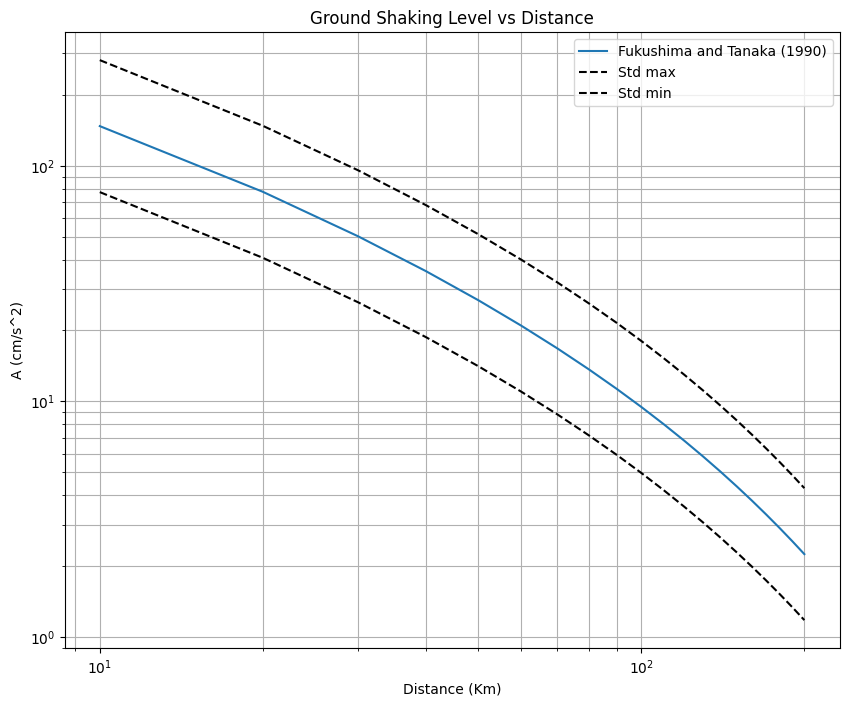

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.loglog(distance, A_distance, label='Fukushima and Tanaka (1990)')
ax.loglog(distance, stdmax_distance, 'k--', label='Std max')
ax.loglog(distance, stdmin_distance, 'k--', label='Std min')
ax.set_xlabel('Distance (Km)')
ax.set_ylabel('A (cm/s^2)')
ax.grid(which='both')
ax.set_title('Ground Shaking Level vs Distance')
plt.legend()

As we can see in Figure above, the ground shaking intensity is decreasing along the increasing of distance, this is why the equation is called attenuation relationship. The ground shaking will not be felt significantly on wide distance.

Now, let us calculate the ground shaking by varying the magnitude and constant distance (i.e. R = 10 Km). We adjust the minimum magnitude is 4 and maximum magnitude is 9 with bin 0.1.

In [13]:
minMag = 4
maxMag = 9.1
magBin = 0.1
R = 10
magnitudes = np.arange(minMag,maxMag,magBin)
magnitudes

array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ])

In [14]:
A_magnitudes, stdmax_magnitudes, stdmin_magnitudes = FukushimaTanaka1990(magnitudes,R).FukushimaTanaka1990()

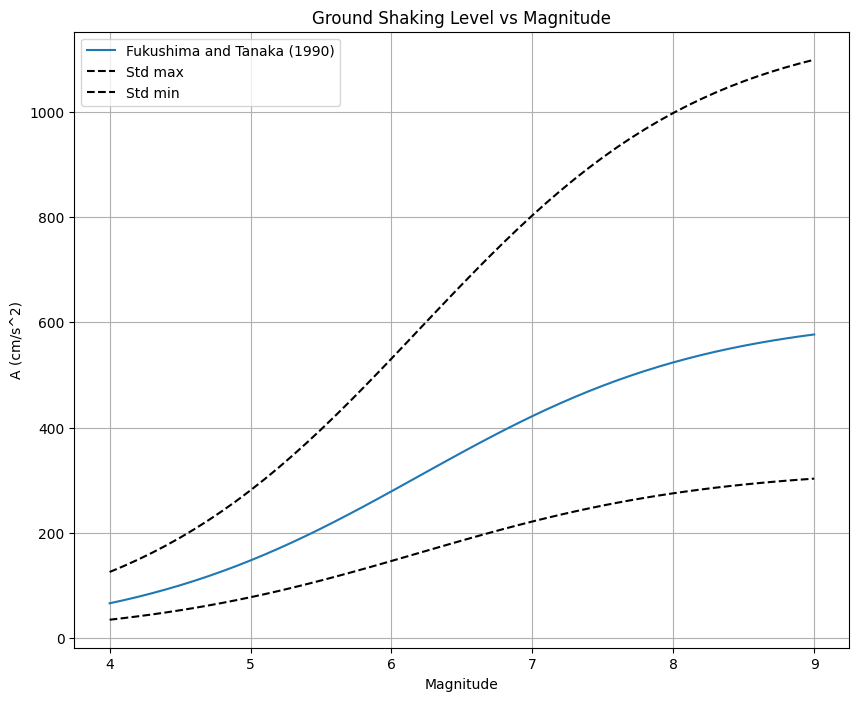

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(magnitudes, A_magnitudes, label='Fukushima and Tanaka (1990)')
ax.plot(magnitudes, stdmax_magnitudes, 'k--', label='Std max')
ax.plot(magnitudes, stdmin_magnitudes, 'k--', label='Std min')
ax.set_xlabel('Magnitude')
ax.set_ylabel('A (cm/s^2)')
ax.grid(which='both')
ax.set_title('Ground Shaking Level vs Magnitude')
plt.legend()

We see that the increasing magnitude gives the high ground shaking intensity. The main aim of seismic hazard analysis is to estimate the ground shaking intensity of a region if an earthquake occur suddenly. This can be utilized for the mitigation purposes, such as earthquake-resilient structure development.

To this point, we have just learned the concept of DSHA or scenario method for seismic hazard analysis. We could calculate the ground shaking for a region (area) by varying distances and magnitudes from the source. For its exercise will be explained in the next article.

## References

1. [Baker, J., Bradley, B., & Stafford, P. (2021). Seismic hazard and risk analysis. Cambridge University Press.](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=im82jgIAAAAJ&cstart=20&pagesize=80&sortby=pubdate&citation_for_view=im82jgIAAAAJ:CYCckWUYoCcC)
2. [Baker, J. W. (2013). An introduction to probabilistic seismic hazard analysis. White paper version, 2(1), 79.](https://scits.stanford.edu/sites/g/files/sbiybj22081/files/media/file/baker_2013_intro_psha_v2_0.pdf)
3. [Kijko, A. (2019). Seismic hazard. Encyclopedia of solid earth geophysics, 1-14.](https://www.researchgate.net/profile/Ansie-Smit/publication/282855390_PRESENTATION_Introduction_to_Probabilistic_Seismic_Hazard_Analysis/links/561f556b08aef097132d19af/PRESENTATION-Introduction-to-Probabilistic-Seismic-Hazard-Analysis.pdf)
